# Model Quality and Improvements - Week 4, P.M. Kuria

## 1. Defining the Question

### a) Specifying the Data Analysis Question

As a data professional working for a pharmaceutical company, you need to develop a model that predicts whether a patient will be diagnosed with diabetes. The model needs to have an accuracy score greater than 0.85.

### b) Understanding the Context

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin.

### c) Recording the Experimental Design


● Data Importation

● Data Exploration

● Data Cleaning

● Data Preparation

● Data Modeling (Using Decision Trees, Random Forest and Logistic Regression)

● Model Evaluation

● Hyparameter Tuning

● Findings and Recommendations

#Data Importation

##Load Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas_profiling as pp
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from scipy.stats import uniform
from sklearn import tree
import numpy as np

%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Exploration: Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

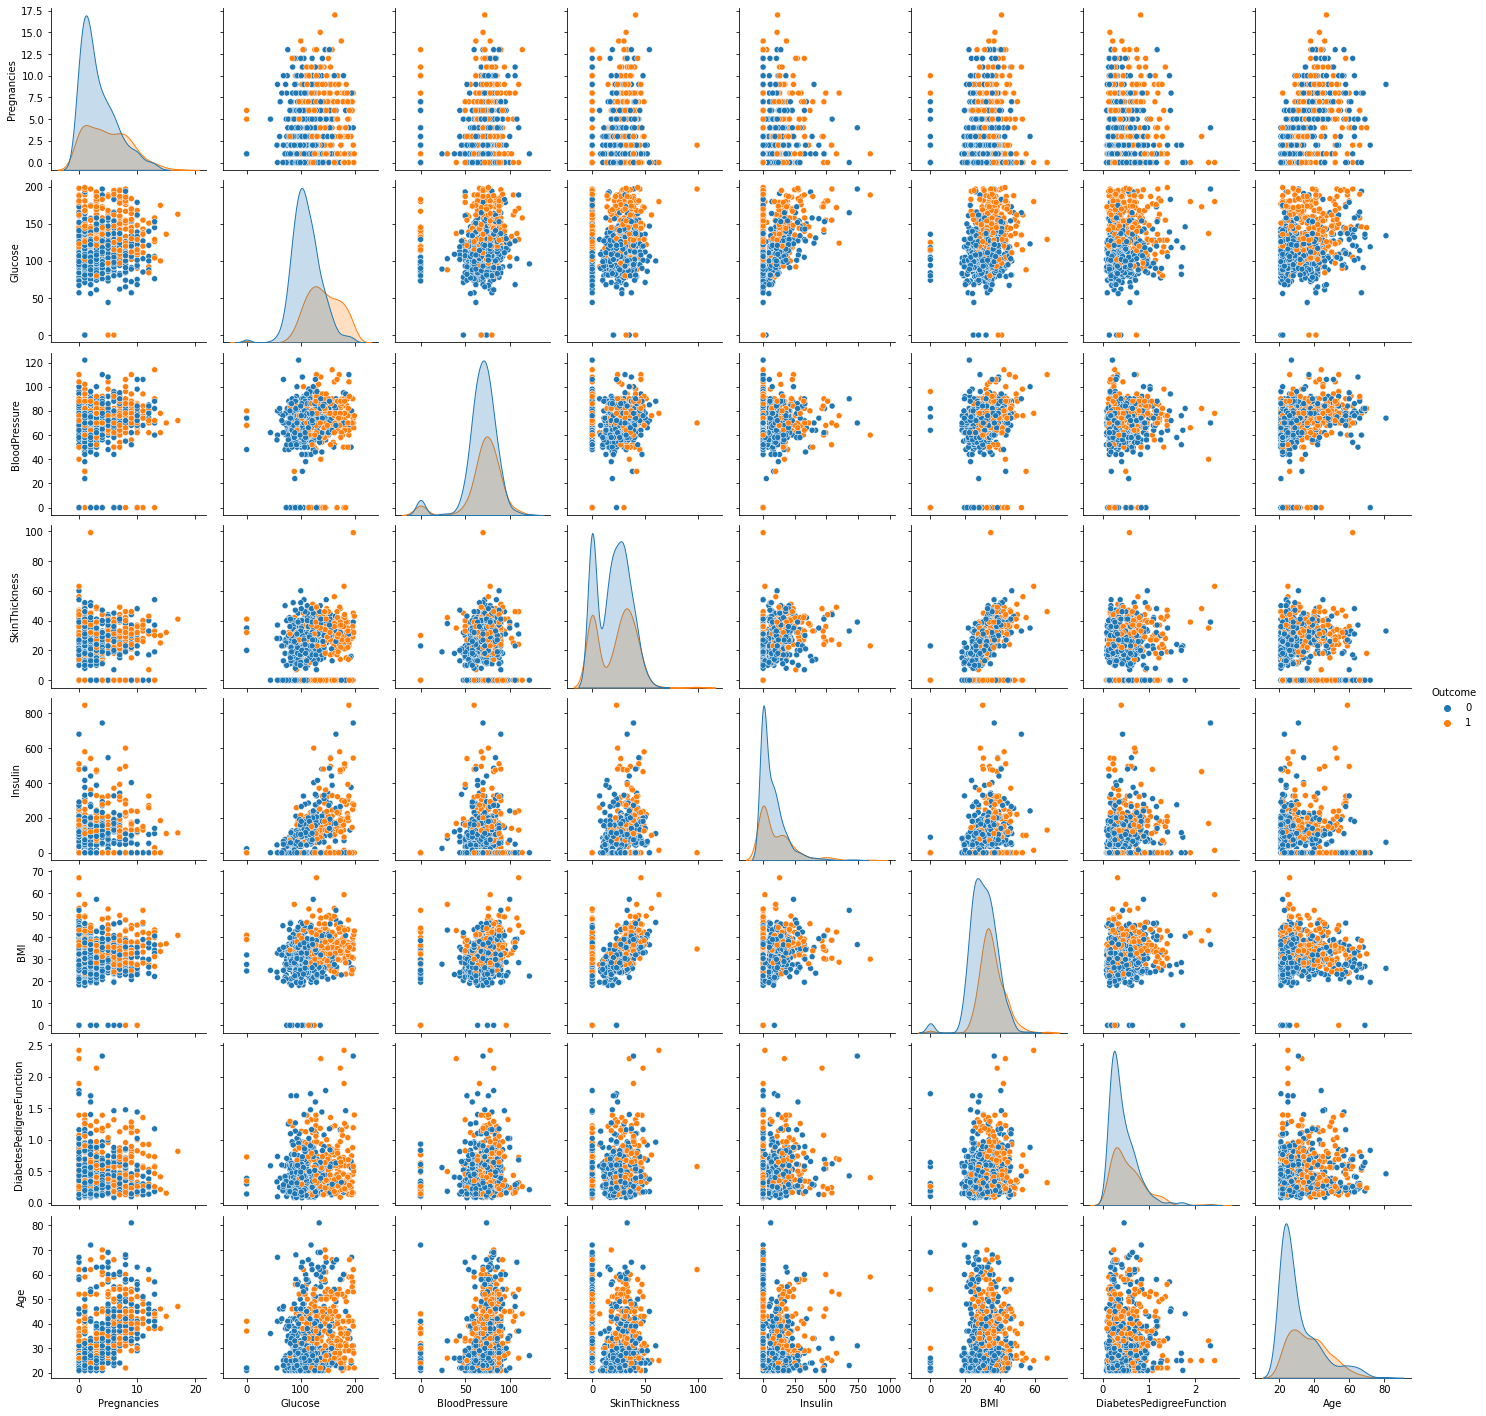

In [6]:
#Checking the distribution of the target column
sns.pairplot(df, hue = 'Outcome')

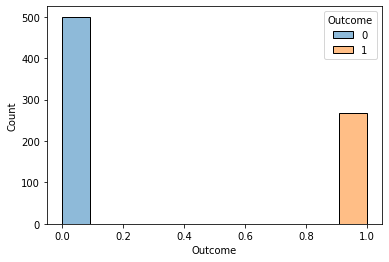

In [7]:
sns.histplot(x=df['Outcome'], hue= df['Outcome'])

There are more healthy patients than Diabetic patients, we need to check if that would affect our predictions models

In [12]:
#Get co-relation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


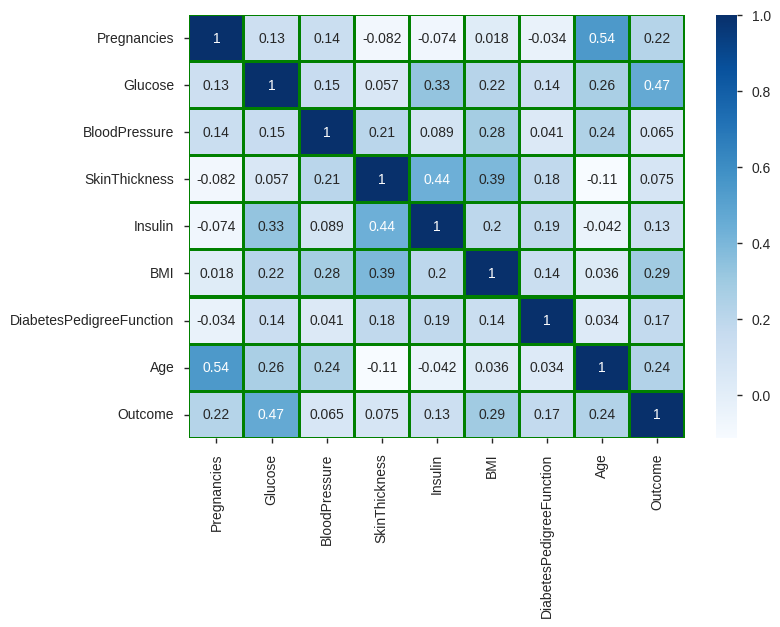

In [13]:
#plot the heat map of the correaltions
sns.heatmap(df.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)

# Data Cleaning

From the profile report we could see that the insulin has a large number of zeros, as such lets drop the column.
Also for the features like BloodPressure and SkinThickness 0s are replaced by mean

In [19]:

df['BloodPressure'].replace(0,np.nan,inplace =True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace = True)

df['SkinThickness'].replace(0,np.nan,inplace =True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace = True)



Visualizing the features for skewness

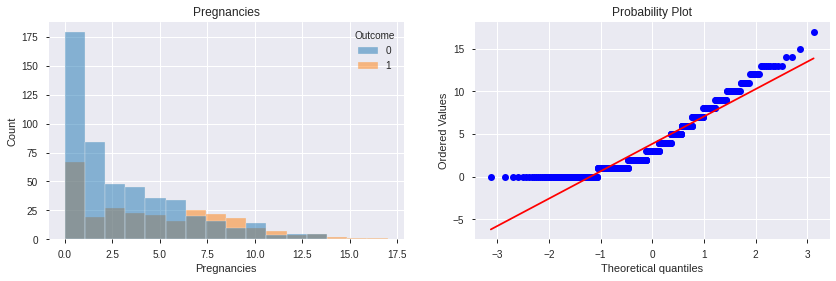

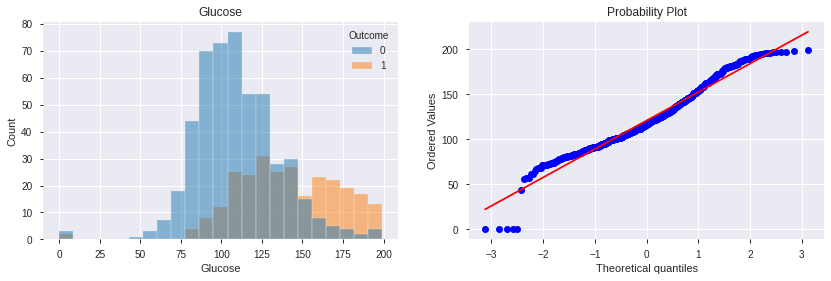

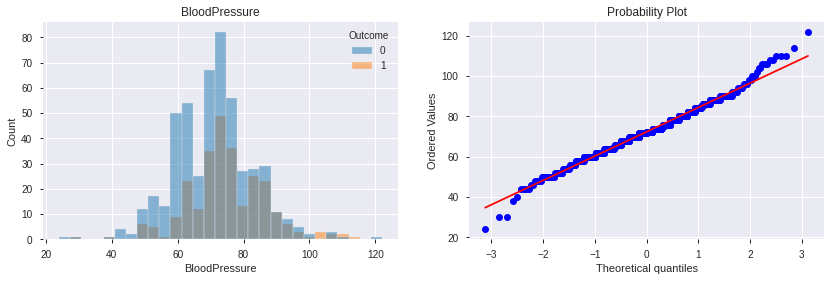

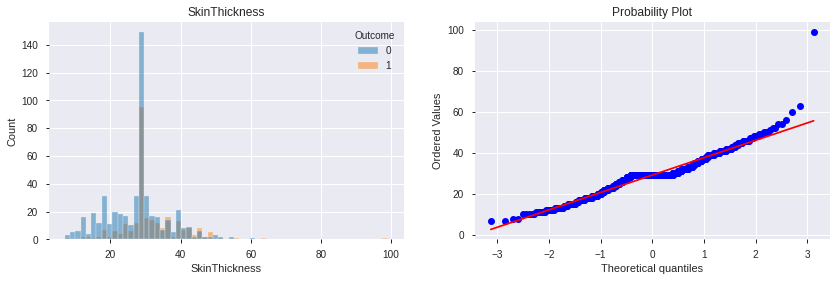

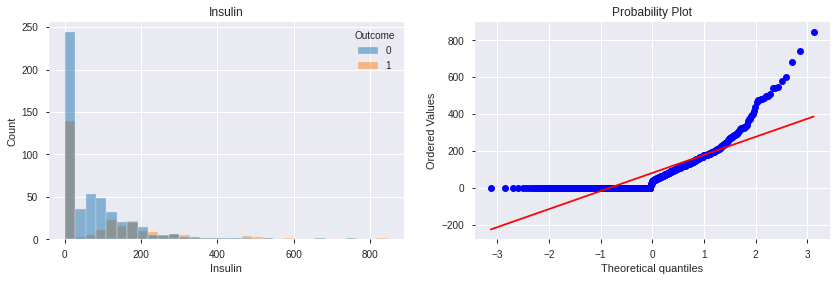

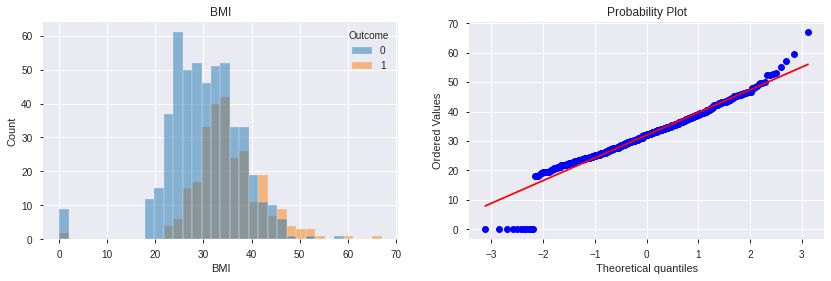

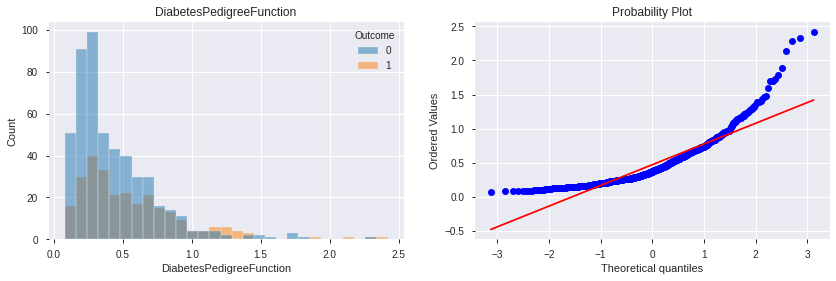

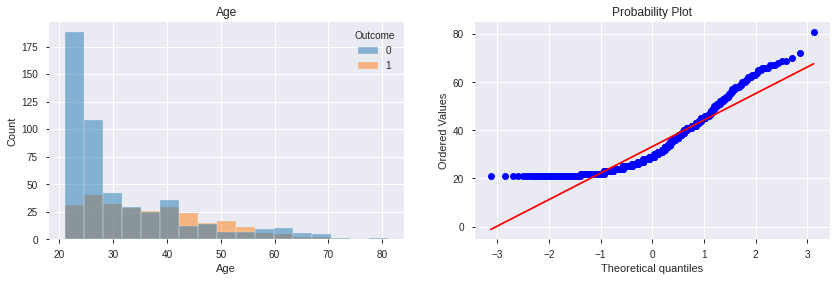

In [23]:
for i in df.columns:
    if(i != 'Outcome'):
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        #the figure has 1 row, 2 columns, and this plot is the first (1) plot.
        sns.histplot(x =df[i], hue = df['Outcome'])
        plt.title(i)
    
        plt.subplot(1,2,2)
        #the figure has 1 row, 2 columns, and this plot is the second (2) plot.
        stats.probplot(x =df[i], dist ='norm', plot = plt)               
    plt.show()

# Data Preparation

We will need to normailizing and transforming the features to remove the skewness and resemble the normal distribution


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
X = df.drop('Outcome', axis =1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pt = PowerTransformer(method = 'yeo-johnson')
std_scaler = StandardScaler()
X_train = pd.DataFrame(data =std_scaler.fit_transform(pt.fit_transform(X_train)),columns = X_train.columns)
df_pt= pd.merge(X_train,y_train,right_index= True,left_index= True)
df_pt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,0.032235,0.023316,0.021919,0.008648,0.024881,0.042889,-0.001362,0.023240,0.345946
std,0.972703,1.018311,0.992801,0.971193,0.999450,0.987623,0.998220,0.992605,0.476320
min,-1.606051,-3.660528,-3.382035,-2.681880,-1.010891,-3.718453,-2.027889,-1.468399,0.000000
25%,-0.818641,-0.648671,-0.660252,-0.541543,-1.010891,-0.630958,-0.736311,-0.838257,0.000000
50%,0.064067,-0.092035,-0.026613,0.073703,0.564010,-0.010851,-0.085556,-0.087096,0.000000
75%,0.854084,0.622345,0.632756,0.403720,0.976974,0.624032,0.803115,0.942827,1.000000
max,2.162908,2.436209,4.166075,3.696525,1.623107,4.968874,2.347963,2.105762,1.000000


In [30]:
X_test= pd.DataFrame(data =std_scaler.transform(pt.transform(X_test)),columns = X_test.columns)

X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.090225,0.004071,0.042596,0.137377,-0.011515,0.015391,0.051434,0.047918
std,1.050848,0.967368,0.976011,1.079367,1.000521,1.082291,1.000630,1.001702
min,-1.606051,-1.845207,-2.129026,-2.835502,-1.010891,-3.718453,-1.987898,-1.468399
25%,-0.818641,-0.725788,-0.680611,-0.180400,-1.010891,-0.497787,-0.733139,-0.838257
50%,0.064067,-0.184968,0.006659,0.073703,0.221730,0.075649,-0.057580,-0.087096
75%,1.053607,0.746903,0.467439,0.518184,0.965161,0.627426,0.938874,0.942827
max,1.939237,2.373411,3.484963,7.104764,1.590476,3.520738,2.056853,1.865476


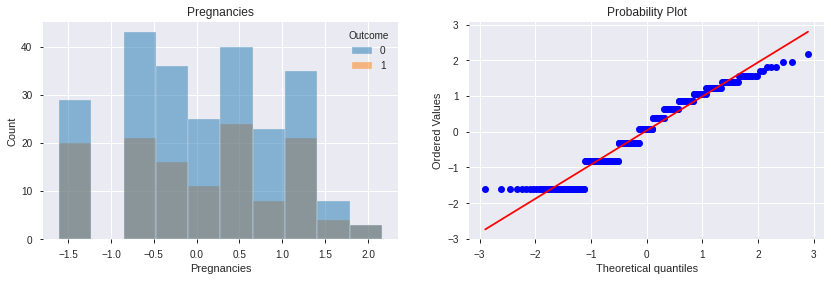

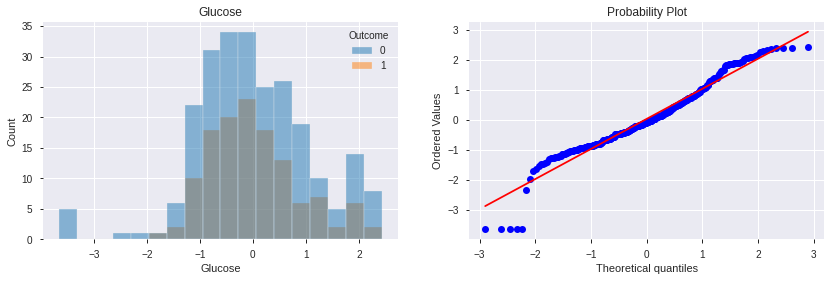

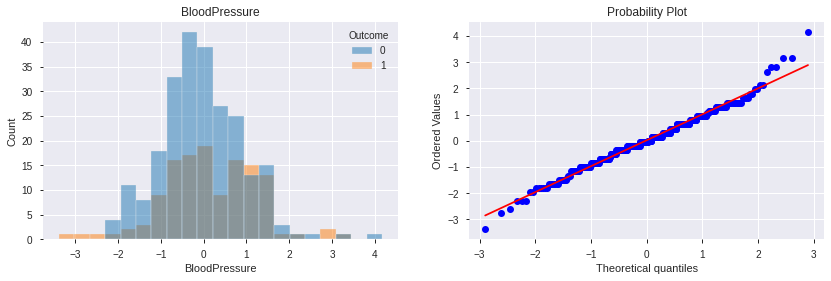

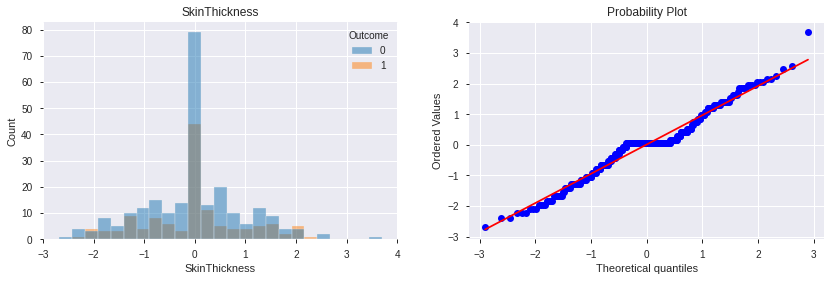

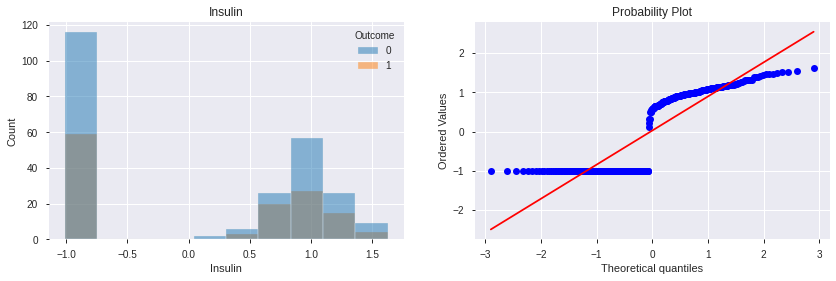

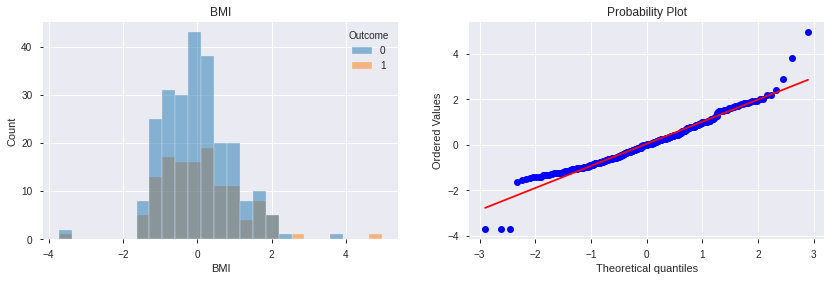

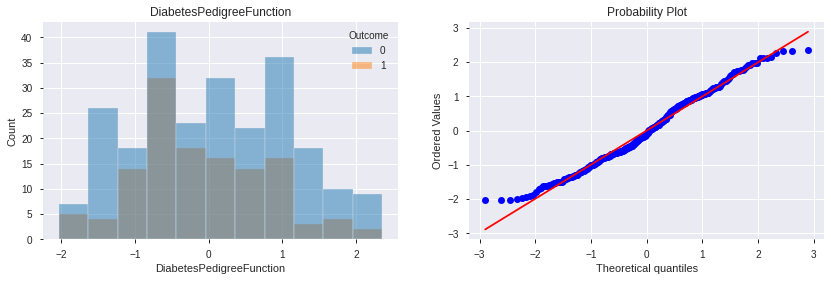

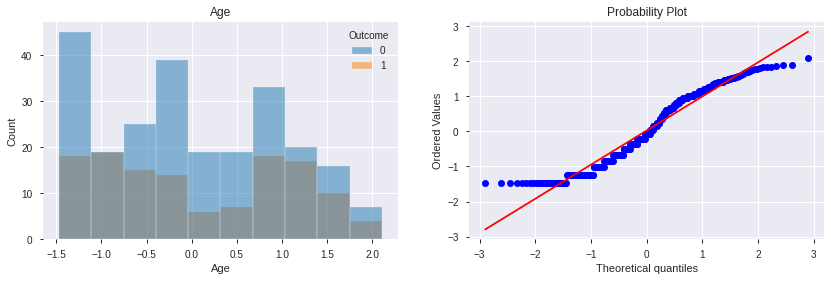

In [31]:
for i in df_pt.columns:
    if(i != 'Outcome'):
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        sns.histplot(x =df_pt[i], hue = df_pt['Outcome'])
        plt.title(i)
    
        plt.subplot(1,2,2)
        stats.probplot(x =df_pt[i], dist ='norm', plot = plt)               
    plt.show()

The Feature distribution are normalized. This shall help in faster convergence and better results for the logistice regression

# Data Modelling : Machine Learning Modelling, Evaluation and Hyparameter Tuning

In [32]:


df = df_pt
df_mean_std_train = pd.DataFrame(data = [X_train.mean(), X_train.std()], columns = X_train.columns)
df_mean_std_test = pd.DataFrame(data = [X_test.mean(), X_test.std()], columns = X_test.columns)
df_mean_std_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-2.646342e-17,0.000000,-3.307927e-18,-1.323171e-17,6.615854e-18,8.269818e-18,1.653964e-17,-3.307927e-18
1,1.000932e+00,1.000932,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00


The mean would be almost 0 and the st dev is close to 1 for standard scalar
For min_max_scalar data will range from 0 to 1 or -1 to 1
Generally for scaling is done on the training data separately, this is done to ensure we don't overfit

## Random Forest

In [79]:
def model_repot(model_name, y_predicted, y_test):
  print('\n',model_name, ' classification report')
  print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num
  print(model_name, ': ROC AUC = ',str(round(roc_auc_score(y_test, y_predicted)*100,1)), '%')
  print(model_name, ': Precision = ',str(round(precision_score(y_test, y_predicted)*100,1)), '%')
  print(model_name, ': Recall = ',str(round(recall_score(y_test, y_predicted)*100,1)), '%')
  print(model_name, ': Accuracy = ',str(round(accuracy_score(y_test, y_predicted)*100,1)), '%')
  print(model_name, ': F1-Score = ',str(round(f1_score(y_test, y_predicted)*100,1)), '%')
  confusion_matrix(y_test, y_predicted)

In [80]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
model_repot('Forest', forest.predict(X_test), y_test)


 Forest  classification report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Forest : ROC AUC =  71.3 %
Forest : Precision =  62.5 %
Forest : Recall =  62.5 %
Forest : Accuracy =  74.0 %
Forest : F1-Score =  62.5 %


In [81]:
#define function for roc auc curve
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

ROC AUC Score:  71.3 %


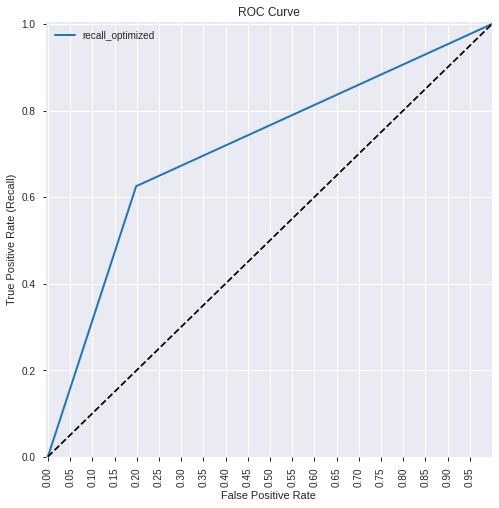

In [82]:
y_predicted = forest.predict(X_test)
y_predicted_train = forest.predict(X_train)

#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(y_test, y_predicted)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [40]:
#Define function to see precision and recall threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [41]:

p, r, thresholds = precision_recall_curve(y_test, y_predicted)

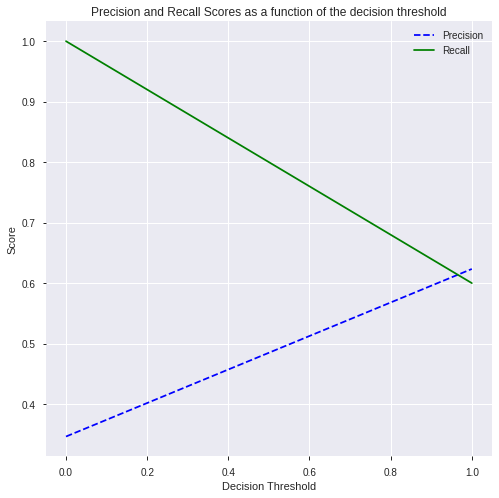

In [42]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)
#plt.savefig('fig/Precision-Recall Threshold RF.png')

In [83]:
forest_tuned = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
forest_tuned.fit(X_train,y_train)
model_repot('Forest', forest_tuned.predict(X_test), y_test)


 Forest  classification report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

Forest : ROC AUC =  71.4 %
Forest : Precision =  64.9 %
Forest : Recall =  60.0 %
Forest : Accuracy =  74.9 %
Forest : F1-Score =  62.3 %


Tuning improved Random forest, improved by 0.9 to 74.9% still under our target of 0.85

## Logistic Regression

In [84]:
logreg = LogisticRegression(C=10)
logreg.fit(X_train,y_train)
logreg.predict(X_test)
model_repot('Logistic', logreg.predict(X_test), y_test)


 Logistic  classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231

Logistic : ROC AUC =  70.4 %
Logistic : Precision =  62.3 %
Logistic : Recall =  60.0 %
Logistic : Accuracy =  73.6 %
Logistic : F1-Score =  61.1 %


ROC AUC Score:  71.3 %


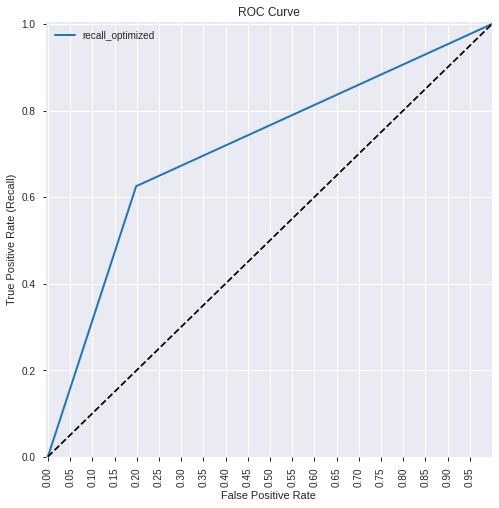

In [85]:
#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(y_test, y_predicted)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')
#plt.savefig('fig/Logreg ROC Curve.png')

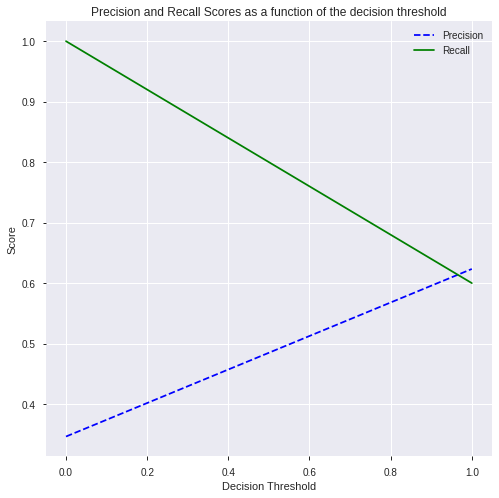

In [59]:
p, r, thresholds = precision_recall_curve(y_test, y_predicted)
plot_precision_recall_vs_threshold(p, r, thresholds)

## Decision Tree

In [86]:

dt = DecisionTreeClassifier(random_state=42)
dt_model = dt.fit(X_train,y_train)
model_repot('Decison Tree', dt.predict(X_test), y_test)


 Decison Tree  classification report
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       151
           1       0.54      0.71      0.62        80

    accuracy                           0.69       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.72      0.69      0.70       231

Decison Tree : ROC AUC =  69.7 %
Decison Tree : Precision =  54.3 %
Decison Tree : Recall =  71.2 %
Decison Tree : Accuracy =  69.3 %
Decison Tree : F1-Score =  61.6 %


ROC AUC Score:  64.5 %


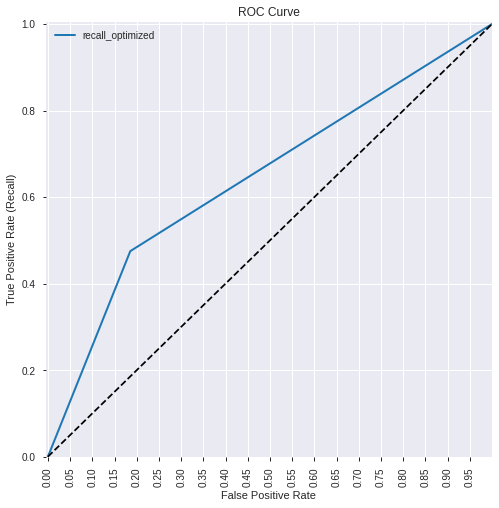

In [67]:
#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred)
print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

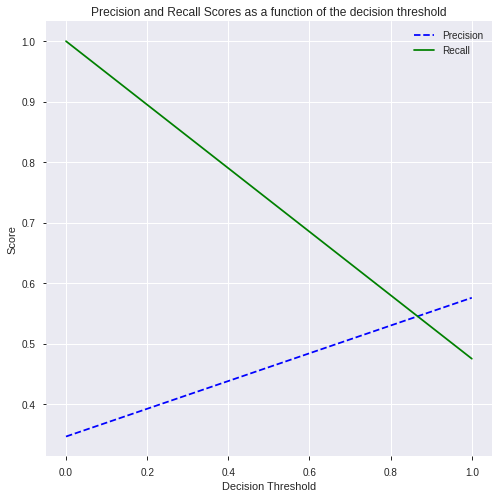

In [68]:

p, r, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [87]:
# list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion =['entropy']
splitter = ['random']

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'criterion':criterion,
               'splitter': splitter
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
dt_model = clf.fit(X_train, y_train)

#Prediksi menggunakan model baru
y_pred = dt_model.predict(X_test)#Check performa dari model
model_repot('Decison Tree', y_pred, y_test)


 Decison Tree  classification report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231

Decison Tree : ROC AUC =  64.5 %
Decison Tree : Precision =  57.6 %
Decison Tree : Recall =  47.5 %
Decison Tree : Accuracy =  69.7 %
Decison Tree : F1-Score =  52.1 %


After tuning the accuracy increase by +0.3% to 69.7%, still under the target 85%

# Findings and Recommendations

## Findings



*   Among the models evaluted Random Forest tops in accuracy achieveing 74.9%.
*   Key features determining the high likelihood of diabetes are Glucose, Age and BMI 






## Recommendations



*   Use of Random Forest model is recommended
*   More training data will increase the accuracy of the model
*   Hyper paramter tuning is required in order to improve model accuracy.




